# **Cài đặt thư viện**

In [1]:
pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.22.2
    Uninstalling huggingface-hub-0.22.2:
      Successfully uninstalled huggingface-hub-0.22.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


# **Import Dataset**

In [3]:
import gdown

#train
!gdown --id 1LBbJMPoY37FmkDL2DsQCWIrr3poAjlfa

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LBbJMPoY37FmkDL2DsQCWIrr3poAjlfa
To: /kaggle/working/train_bbc_processed.zip
100%|███████████████████████████████████████| 3.58M/3.58M [00:00<00:00, 192MB/s]


In [4]:
import gdown

#val
!gdown --id 1tGp_FD8aDu3KyRkp20yw2WYS-N41VJHi

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tGp_FD8aDu3KyRkp20yw2WYS-N41VJHi
To: /kaggle/working/valid_bbc_processed.zip
100%|████████████████████████████████████████| 911k/911k [00:00<00:00, 98.8MB/s]


In [5]:
import shutil
# train
shutil.unpack_archive("train_bbc_processed.zip")

In [6]:
import shutil
# val
shutil.unpack_archive("valid_bbc_processed.zip")

In [7]:
import os

folder_path = '/kaggle/working/'

content_list = os.listdir(folder_path)

# In ra tất cả các thư mục và tệp tin trong folder_path
print("Danh sách các thư mục và tệp tin:")
for content in content_list:
    print(content)

train_folder_path = os.path.join(folder_path, 'train_bbc_processed')
val_folder_path = os.path.join(folder_path, 'valid_bbc_processed')

Danh sách các thư mục và tệp tin:
train_bbc_processed
.virtual_documents
valid_bbc_processed
train_bbc_processed.zip
valid_bbc_processed.zip


In [8]:
from datasets import load_from_disk

# Đọc dataset từ thư mục đã chỉ định
train_dataset = load_from_disk(train_folder_path)
val_dataset = load_from_disk(val_folder_path)

In [9]:
print(train_dataset[0]) 

{'Articles': 'Fockers keeps US box office lead..Film comedy Meet The Fockers, sequel to Meet The Parents, has topped the US box office for a third week.The movie, which stars Ben Stiller, Robert De Niro, Dustin Hoffman and Barbra Streisand, took 28.5m 15.2m, making a total of 204.3m 109m. Michael Keaton thriller White Noise was second with 24m 12.8m despite negative reviews. Martin Scorseses Howard Hughes biopic The Aviator came third with 7.6m 4m and a total of 42.9m 22.8m. Childrens adventure Lemony Snickets A Series of Unfortunate Events, starring Jim Carrey and Meryl Streep, fell two places to fourth position with 7.4m 3.9m.It is also the ninth Jim Carrey film to hit the 100m 53.2m mark, according to Exhibitor Relations. And Fat Albert, a liveaction adaptation of Bill Cosbys TV cartoon, fell one place to number five, with takings over the three days beginning on Friday of 5m 2.6m. Oceans Twelve took sixth place in the US chart with 5.4m 2.8m, but it led the nonUS chart at the weeke

# **Tải mô hình từ huggingface**

In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

# **Fine-tuning mô hình BART**

In [15]:
import time
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset

# Xác định đối số đào tạo
training_args = Seq2SeqTrainingArguments(
    output_dir="./bart-bbc-news",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=3,
    per_device_eval_batch_size=3,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=3,
    predict_with_generate=True,
    save_strategy="steps", 
    logging_steps=1,
)

# khởi tạo huấn luyện
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# fine-tune mô hình
trainer.train()

2024-06-23 16:45:29.844545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 16:45:29.844649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 16:45:29.959112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please speci

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.074200,0.264835
2,0.055100,0.258537
3,0.048000,0.262044


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_

TrainOutput(global_step=1557, training_loss=0.2641148131637425, metrics={'train_runtime': 1045.4782, 'train_samples_per_second': 4.465, 'train_steps_per_second': 1.489, 'total_flos': 5058022141329408.0, 'train_loss': 0.2641148131637425, 'epoch': 3.0})

# **Lưu trữ vào huggingface**

In [16]:
from huggingface_hub import notebook_login
notebook_login()

In [17]:
trainer.push_to_hub()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

events.out.tfevents.1719161140.690f0dd1c60d.34.0:   0%|          | 0.00/335k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ifyou819/bart-bbc-news/commit/07588443428a1534f12f9a2d2348e7a140d0e977', commit_message='End of training', commit_description='', oid='07588443428a1534f12f9a2d2348e7a140d0e977', pr_url=None, pr_revision=None, pr_num=None)

# **Đánh giá bản tóm tắt do mô hình tạo ra**

In [18]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


In [11]:
import gdown

#test
!gdown --id 1V7YZAqwInYfC-R7Pm9S0I_AZgxMb_ldd

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V7YZAqwInYfC-R7Pm9S0I_AZgxMb_ldd
To: /kaggle/working/test_bbc_processed.zip
100%|█████████████████████████████████████████| 613k/613k [00:00<00:00, 109MB/s]


In [12]:
import shutil
# test
shutil.unpack_archive("test_bbc_processed.zip")

In [19]:
folder_path = '/kaggle/working/'
test_folder_path = os.path.join(folder_path, 'test_bbc_processed')

# Đọc dataset từ thư mục đã chỉ định
test_dataset = load_from_disk(test_folder_path)

In [20]:
print(test_dataset[0]) 

{'Articles': 'A November to remember..Last Saturday, one newspaper proclaimed that England were still the number one side in the world.That statement was made to look a little foolish by events later that afternoon at Twickenham. But it illustrated the wonderful unpredictability of Test rugby at the highest level, at the end of a richly entertaining autumn series. The final weekend threw the world pecking order into renewed confusion, with Australias triumph in London followed by Frances capitulation to New Zealand. Clearly, there is no number one side in the world at the moment, declared Wallabies coach Eddie Jones on arrival back in Sydney. There are four, five or probably six sides all competing at the same level and on any given day the difference between one side and another is only about 1.While that bodes well for rugby as a whole, it also sharpens the sense of excitement ahead of what could be the most open Six Nations Championship for a decade. While the Wallabies, All Blacks 

In [21]:
from rouge import Rouge
# đánh giá mô hình đã được fine-tune trên tập test
test_predictions = trainer.predict(test_dataset)
rouge = Rouge()

In [22]:
# Lấy danh sách dự đoán và nhãn thực tế từ kết quả dự đoán
predictions = test_predictions.predictions.tolist()
labels = test_predictions.label_ids.tolist()


In [23]:
from rouge import Rouge

# chuyển đổi các phần tử trong predictions và labels sang chuỗi
predictions = [str(pred) for pred in predictions]
labels = [str(label) for label in labels]

# nối các từ trong mỗi chuỗi thành một câu hoàn chỉnh
predictions = [' '.join(pred.split()) for pred in predictions]
labels = [' '.join(label.split()) for label in labels]

# tính toán điểm ROUGE cho toàn bộ tập test
all_scores = rouge.get_scores(predictions, labels)

# tính toán trung bình điểm ROUGE
rouge_1_f = 0
rouge_2_f = 0
rouge_l_f = 0

rouge_1_r = 0
rouge_1_p = 0
rouge_2_r = 0
rouge_2_p = 0
rouge_l_r = 0
rouge_l_p = 0

for scores in all_scores:
  rouge_1_f += scores['rouge-1']['f']
  rouge_2_f += scores['rouge-2']['f']
  rouge_l_f += scores['rouge-l']['f']

  rouge_1_r += scores['rouge-1']['r']
  rouge_1_p += scores['rouge-1']['p']
  rouge_2_r += scores['rouge-2']['r']
  rouge_2_p += scores['rouge-2']['p']
  rouge_l_r += scores['rouge-l']['r']
  rouge_l_p += scores['rouge-l']['p']

total_scores = len(all_scores)
rouge_1_f /= total_scores
rouge_2_f /= total_scores
rouge_l_f /= total_scores

rouge_1_r /= total_scores
rouge_1_p /= total_scores
rouge_2_r /= total_scores
rouge_2_p /= total_scores
rouge_l_r /= total_scores
rouge_l_p /= total_scores

# In kết quả
print("\n--- Kết quả trung bình ---")
print("ROUGE-1 - Recall: ", rouge_1_r, " Precision: ", rouge_1_p, " F1: ", rouge_1_f)
print("ROUGE-2 - Recall: ", rouge_2_r, " Precision: ", rouge_2_p, " F1: ", rouge_2_f)
print("ROUGE-L - Recall: ", rouge_l_r, " Precision: ", rouge_l_p, " F1: ", rouge_l_f)


--- Kết quả trung bình ---
ROUGE-1 - Recall:  0.6445322344663198  Precision:  0.7711003117420278  F1:  0.6926677201641284
ROUGE-2 - Recall:  0.5591866390621292  Precision:  0.7038638384090629  F1:  0.6116586481516326
ROUGE-L - Recall:  0.5138442706948885  Precision:  0.611862271717166  F1:  0.5509679990147056


**Lưu trữ kết quả vào wandb**

In [24]:
import wandb

# lưu điểm rouge vào wandb
wandb.log({
    "rouge-1/f1": rouge_1_f,
    "rouge-2/f1": rouge_2_f,
    "rouge-l/f1": rouge_l_f,
    "rouge-1/recall": rouge_1_r,
    "rouge-1/precision": rouge_1_p,
    "rouge-2/recall": rouge_2_r,
    "rouge-2/precision": rouge_2_p,
    "rouge-l/recall": rouge_l_r,
    "rouge-l/precision": rouge_l_p
})

**Biểu đồ chỉ số rouge**

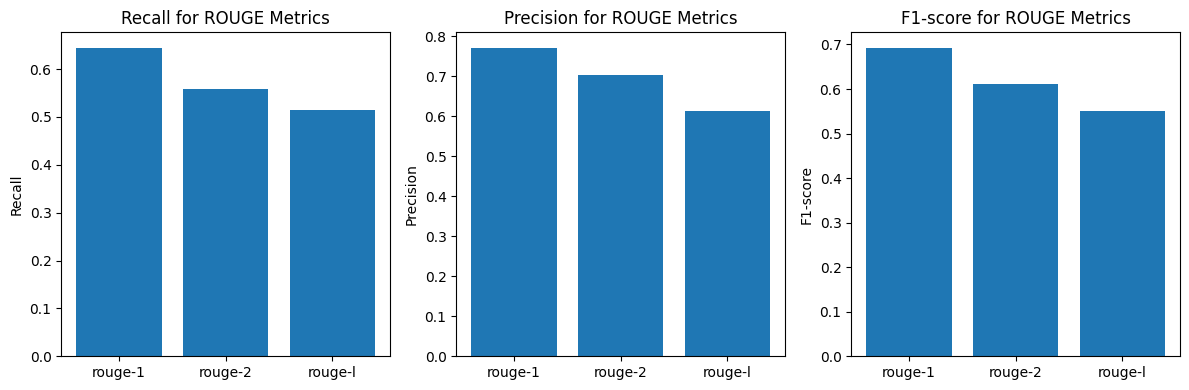

In [25]:
from rouge import Rouge
import matplotlib.pyplot as plt

# Dữ liệu cho biểu đồ
rouge_metrics = ['rouge-1', 'rouge-2', 'rouge-l']
recall_values = [rouge_1_r, rouge_2_r, rouge_l_r]
precision_values = [rouge_1_p, rouge_2_p, rouge_l_p]
f1_values = [rouge_1_f, rouge_2_f, rouge_l_f]

# Tạo biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Biểu đồ Recall
axes[0].bar(rouge_metrics, recall_values)
axes[0].set_ylabel('Recall')
axes[0].set_title('Recall for ROUGE Metrics')

# Biểu đồ Precision
axes[1].bar(rouge_metrics, precision_values)
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision for ROUGE Metrics')

# Biểu đồ F1-score
axes[2].bar(rouge_metrics, f1_values)
axes[2].set_ylabel('F1-score')
axes[2].set_title('F1-score for ROUGE Metrics')

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [77]:
import wandb
api = wandb.Api()

run = api.run("fine-tune-gpt-model/huggingface/runs/0p0fmklh")

# Lấy số liệu từ một run cụ thể
history = run.history()

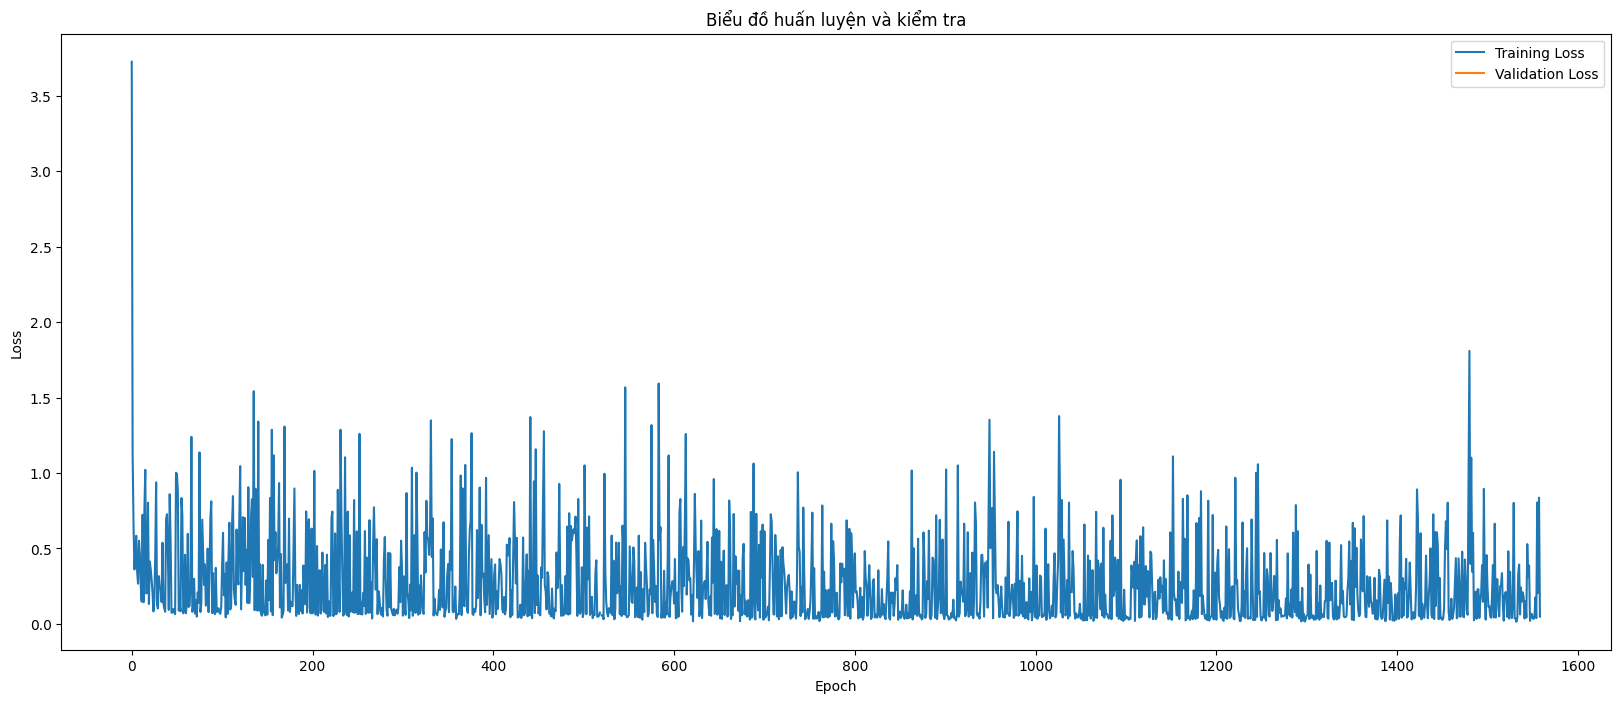

In [81]:
import matplotlib.pyplot as plt

# Tạo Figure với kích thước 20 inches x 8 inches
plt.figure(figsize=(20, 8)) 

# Vẽ biểu đồ nhiều đường
plt.plot(history["train/loss"], label="Training Loss")
plt.plot(history["eval/loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ huấn luyện và kiểm tra")
plt.legend()

plt.show()